In [2]:
import anndata as ad
import scanpy as sc

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\sca

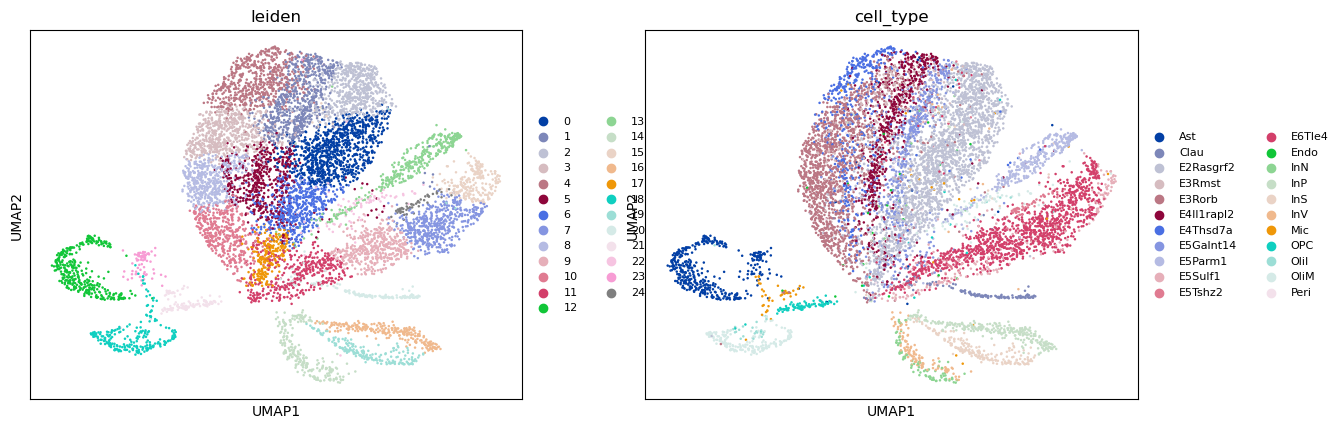

In [3]:
#读取数据
rna=ad.read_h5ad("dataset2.h5ad")
#过滤基因——过滤表达水平低的基因
sc.pp.filter_genes(rna,min_cells=3)
#进行log1p转换，减少数据中的高度偏斜，使数据更接近正态分布
sc.pp.log1p(rna)
#对数据进行所仿，将数据范围所仿到-10~10之间，有助于确保数据的尺度一致性
sc.pp.scale(rna,max_value=10)
#执行主成分分析，啊ing数据降维到30个主成分，这些主成分嗲表了数据中最重要的变化
#arpack指定了使用的奇异值分解（SVD）求解器
sc.pp.pca(rna,n_comps=30,svd_solver='arpack')
#计算细胞之间的近邻关系，基于之前得到的PCA结果，这种近邻关系通常用于后续的聚类分析
sc.pp.neighbors(rna,use_rep='X_pca')
#使用UMAP对数据进行降维和可视化，将高维数据映射到二维或者三维空间，以便于观察数据的结构和聚类
sc.tl.umap(rna)
#进行leiden聚类，将细胞分成不同的群集，resolution=1.5使调整聚类分辨率的参数，影响群集的数量的和大小
sc.tl.leiden(rna,resolution=1.5)
#用UMAP可视化单细胞数据，并用颜色表示leiden聚类和细胞类型（cell_type）是已知的标签
sc.pl.umap(rna,color=["leiden",'cell_type'],legend_fontsize=8)

In [4]:
sc.tl.umap(rna)

In [5]:
rna

AnnData object with n_obs × n_vars = 9190 × 23350
    obs: 'domain', 'cell_type', 'leiden'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
e:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key cell_type in .var_names or .obs.columns.'

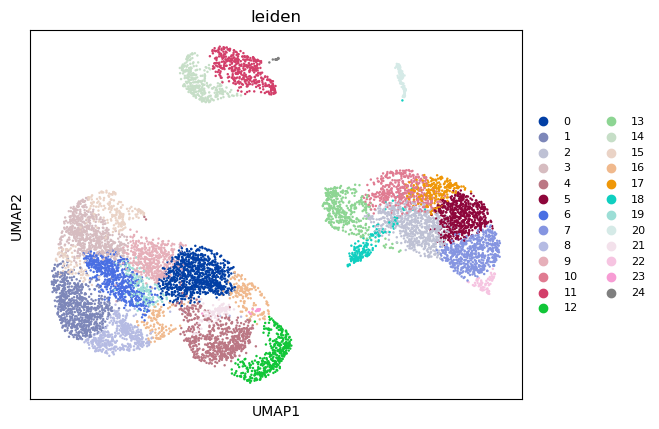

In [6]:
rna=ad.read_h5ad("dataset1.h5ad")
sc.pp.filter_genes(rna,min_cells=3)
sc.pp.log1p(rna)
sc.pp.scale(rna,max_value=10)
sc.pp.pca(rna,n_comps=30,svd_solver='arpack')
sc.pp.neighbors(rna,use_rep='X_pca')
sc.tl.umap(rna)
sc.tl.leiden(rna,resolution=1.5)
sc.pl.umap(rna,color=["leiden",'cell_type'],legend_fontsize=8)